In [ ]:
import pandas as pd
import numpy as np
import wbddh
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from rio_tiler.io import COGReader
from rio_tiler.utils import create_cutline
from rasterio.features import bounds as featureBounds

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
## If you don't have the package installed, you can install it using pip

#%pip install -r requirements.txt

## Introduction to Data Catalog (DDH) APIs

The Data Catalog (DDH) is the World Bank’s central data hub, hosting more than 16,000 datasets—including indicators, microdata, geospatial assets, and reproducibility packages. DDH underpins many Bank platforms by offering direct, cloud-native access to data that applications can consume seamlessly.

For this session we want to showcase some of the commonly used API endpoints that can help you in identifying what data you need and how to use them in your workflows. 

DDH serves both intenral and external audience, so you'll notice separate api hosts for them. The internal host requires user authentication, and the snipptes below will guide you through the process. 

We've developed a [swagger page](https://ddhinboundopenapiprd.ase.worldbank.org/docs/index.html) that provides more information on all the DDH endpoints. 

### Authentication

In [ ]:
## https://ddhinboundopenapiprd.ase.worldbank.org -- host for internal use
## https://ddh-openapi.worldbank.org -- host for external use

## Setting the API host to the internal one. If you are an external user, please set it to the external one.

wbddh.set_api_host("https://ddhinboundopenapiprd.ase.worldbank.org")

In [ ]:
params = {
        "resourceURL": "https://ddhinboundapi.ase.worldbank.org",
		"scope": ["https://ddhinboundapi.ase.worldbank.org/user_impersonation"],
        "tenant": "31a2fec0-266b-4c67-b56e-2796d8f59c36",
        "authorityHostURL" : "https://login.microsoftonline.com",
		"authority": "https://login.microsoftonline.com/31a2fec0-266b-4c67-b56e-2796d8f59c36",
        "clientId": "a1cc8b1d-75a7-4546-8ec7-a4e41c9ec505"
    } 

## This will open up a browser window and authenticate automatically if you're on bank's network.
session = wbddh.create_session(params = params) 

### Search

You can search entire data catalog by either passing keywords (as you would on the UI), or by applying filters to different fields. DDH has it own metadata schema, so be sure take a look a dataset response. 

In [16]:
## Get a list of all datasets in DDH
## Requires pagination. Default is set to 50 records

ds_all = wbddh.get("datasets", session=session).json()

In [ ]:
## This view provides basic information about the datasets, including the dataset unique ID, name, description, and related dates.

pd.DataFrame(ds_all['data']).head()

,dataset_id,dataset_unique_id,archive_nid,name,description,status,versionno,urltitle,createdon,createdby,modifiedon,modifiedby,source,harvest_system_reference,last_updated_date
0,905f37d6-b9c7-eb11-bacc-000d3a5a1a58,0037715,139695,IBRD Statement Of Loans and Guarantees - Histo...,<p>Note: IDs starting with IBRDB and IBRDG are...,PUBLISHED,7,ibrd_statement_of_loans_and_guarantees__histor...,2011-04-08T00:00:00+00:00,# SRV-DDH2-PRD,2026-02-17T00:00:00+00:00,# SRV-DDH2-PRD,FINANCE,DS00975,None
1,f1c08892-bac7-eb11-bacc-000d3a5a1a58,0037738,139765,IFC Advisory Services Projects,<p>Private sector development requires more th...,PUBLISHED,7,ifc_advisory_services_projects,2012-10-24T00:00:00+00:00,# SRV-DDH2-PRD,2026-02-17T00:00:00+00:00,# SRV-DDH2-PRD,FINANCE,DS00071,None
2,89e67fa3-bcc7-eb11-bacc-000d3a5a1a58,0037776,255451,Procurement Notice,<p>This dataset includes procurement tender no...,PUBLISHED,11,procurement_notice,2015-01-20T00:00:00+00:00,# SRV-DDH2-PRD,2026-02-17T00:00:00+00:00,# DDHCRMAdmin,FINANCE,DS00979,None
3,41a41124-c66e-ef11-a671-000d3a36f824,0066218,,Commitments in Trust funds,<p>Trust Fund is a financing arrangement set u...,PUBLISHED,1,commitments_in_trust_funds,2022-11-18T00:00:00+00:00,# srv_ddh_finances,2026-02-17T00:00:00+00:00,# DDHCRMAdmin,FINANCE,DS00271,None
4,16f63488-c56e-ef11-a671-00224806e0fa,0066214,,Disbursements in Trust Funds,<p>Trust Fund is a financing arrangement set u...,PUBLISHED,1,disbursements_in_trust_funds,2022-11-17T00:00:00+00:00,# srv_ddh_finances,2026-02-17T00:00:00+00:00,# DDHCRMAdmin,FINANCE,DS00074,None


In [18]:
## Search by keyword

params = {"qname" :  "gdp"}

ds_gdp = wbddh.get("search", params=params, session=session).json()

In [19]:
pd.DataFrame(ds_gdp['data']).head()

,@search.score,dataset_id,name,dataset_unique_id,archive_nid,status,keywords_list,FavoriteCount,ClickCount,AvgRating,...,temporal_extent,temporal_resolution,spatial_resolution,reference_system,lineage,maintenance_information,subscription,Resources,Indicators,Citation
0,230.400570,3171375f-32c8-eb11-bacc-000d3a5a1a58,GDP ranking,0038130,94570,PUBLISHED,[],NaN,223795.0,None,...,"{'id': '4371375f-32c8-eb11-bacc-000d3a5a1a58',...",{'periodicity': 'Annual'},"{'id': '4471375f-32c8-eb11-bacc-000d3a5a1a58',...","{'id': '4571375f-32c8-eb11-bacc-000d3a5a1a58',...","{'id': '4671375f-32c8-eb11-bacc-000d3a5a1a58',...","{'id': '4771375f-32c8-eb11-bacc-000d3a5a1a58',...","{'id': '4871375f-32c8-eb11-bacc-000d3a5a1a58',...",[{'resource_id': 'ebc72766-32c8-eb11-bacc-000d...,[],[{'id': '1c104bd6-76ce-eb11-bacc-000d3a596ff0'...
1,207.479080,c9134153-32c8-eb11-bacc-000d3a5a1c19,"GDP ranking, PPP based",0038129,94571,PUBLISHED,[],NaN,31446.0,None,...,"{'id': 'db134153-32c8-eb11-bacc-000d3a5a1c19',...",{'periodicity': 'Annual'},"{'id': 'dc134153-32c8-eb11-bacc-000d3a5a1c19',...","{'id': 'dd134153-32c8-eb11-bacc-000d3a5a1c19',...","{'id': 'de134153-32c8-eb11-bacc-000d3a5a1c19',...","{'id': 'df134153-32c8-eb11-bacc-000d3a5a1c19',...","{'id': 'e0134153-32c8-eb11-bacc-000d3a5a1c19',...",[{'resource_id': '0757e958-32c8-eb11-bacc-000d...,[],[]
2,96.380410,1b4a1bd5-93cb-eb11-bacc-000d3a596ff0,Gross Domestic Product (GDP) from Night Lights...,0040236,99548,PUBLISHED,[],NaN,3590.0,None,...,"{'id': '274a1bd5-93cb-eb11-bacc-000d3a596ff0',...",{'periodicity': None},"{'id': '284a1bd5-93cb-eb11-bacc-000d3a596ff0',...","{'id': '294a1bd5-93cb-eb11-bacc-000d3a596ff0',...","{'id': '2a4a1bd5-93cb-eb11-bacc-000d3a596ff0',...","{'id': '2b4a1bd5-93cb-eb11-bacc-000d3a596ff0',...","{'id': '2c4a1bd5-93cb-eb11-bacc-000d3a596ff0',...",[{'resource_id': '3f4a1bd5-93cb-eb11-bacc-000d...,[],[]
3,64.846230,51d2dad5-bdc7-eb11-bacc-000d3a5a1c19,Global Economic Monitor,0037798,94576,PUBLISHED,[],1.0,67214.0,None,...,"{'id': '21d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...",{'periodicity': 'Day'},"{'id': '22d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...","{'id': '23d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...","{'id': '24d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...","{'id': '25d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...","{'id': '26d3dad5-bdc7-eb11-bacc-000d3a5a1c19',...",[{'resource_id': 'a053b1d7-2427-ee11-9966-000d...,[{'id': '21cf3945-56cf-eb11-bacc-000d3a596ff0'...,[{'id': '10d186d6-76ce-eb11-bacc-000d3a3b9510'...
4,34.597748,3d66b90f-f0c8-eb11-bacc-000d3a5a1a58,Jobs,0038543,94590,PUBLISHED,"[P2, P2_000002, P2_000043]",NaN,6709.0,None,...,"{'id': '4e66b90f-f0c8-eb11-bacc-000d3a5a1a58',...",{'periodicity': 'Annual'},"{'id': '4f66b90f-f0c8-eb11-bacc-000d3a5a1a58',...","{'id': '5066b90f-f0c8-eb11-bacc-000d3a5a1a58',...","{'id': '5166b90f-f0c8-eb11-bacc-000d3a5a1a58',...","{'id': '5266b90f-f0c8-eb11-bacc-000d3a5a1a58',...","{'id': '5366b90f-f0c8-eb11-bacc-000d3a5a1a58',...",[{'resource_id': 'adbc4310-f0c8-eb11-bacc-000d...,[{'id': '31c277fa-18cf-eb11-bacc-000d3a596ff0'...,[{'id': '849be275-77ce-eb11-bacc-000d3a3b9510'...


In [20]:
## Search by filtering by country

params = {"qname": "*",
          "filter" : "geographical_extent/coverage/any(i: i/code eq 'AF')"}

ds_con = wbddh.get("search", params = params, session=session).json()

In [21]:
pd.DataFrame(ds_con['data']).head()

,@search.score,dataset_id,name,dataset_unique_id,archive_nid,status,keywords_list,FavoriteCount,ClickCount,AvgRating,...,temporal_extent,temporal_resolution,spatial_resolution,reference_system,lineage,maintenance_information,subscription,Resources,Indicators,Citation
0,1.997089,f3eddfa6-52b7-ee11-a569-0022480b462c,Monthly currency exchange rate estimates by ma...,0065520,None,PUBLISHED,"[FCV, FCV, FCV, FCV, FCV, FCV, Foreign Exchang...",1.0,555.0,None,...,"{'id': '16eedfa6-52b7-ee11-a569-0022480b462c',...",{'periodicity': None},"{'id': '17eedfa6-52b7-ee11-a569-0022480b462c',...","{'id': '18eedfa6-52b7-ee11-a569-0022480b462c',...","{'id': '19eedfa6-52b7-ee11-a569-0022480b462c',...","{'id': '1aeedfa6-52b7-ee11-a569-0022480b462c',...","{'id': '1beedfa6-52b7-ee11-a569-0022480b462c',...",[{'resource_id': '0064dfac-52b7-ee11-a569-0022...,[],[]
1,1.997089,8d7cd049-fa40-ec11-8c62-000d3a34c189,Monthly food price inflation estimates by country,0060165,None,PUBLISHED,"[Agricultural prices, Agricultural prices, Agr...",1.0,481.0,None,...,"{'id': 'b07cd049-fa40-ec11-8c62-000d3a34c189',...",{'periodicity': None},"{'id': 'b17cd049-fa40-ec11-8c62-000d3a34c189',...","{'id': 'b27cd049-fa40-ec11-8c62-000d3a34c189',...","{'id': 'b37cd049-fa40-ec11-8c62-000d3a34c189',...","{'id': 'b47cd049-fa40-ec11-8c62-000d3a34c189',...","{'id': 'b57cd049-fa40-ec11-8c62-000d3a34c189',...",[{'resource_id': 'e5a5ad50-fa40-ec11-8c62-000d...,[],[]
2,1.997089,5c88c256-fa40-ec11-8c62-000d3a34c189,Monthly food price estimates by product and ma...,0060166,None,PUBLISHED,"[Agricultural prices, Agricultural prices, Agr...",NaN,145.0,None,...,"{'id': '7f88c256-fa40-ec11-8c62-000d3a34c189',...",{'periodicity': None},"{'id': '8088c256-fa40-ec11-8c62-000d3a34c189',...","{'id': '8188c256-fa40-ec11-8c62-000d3a34c189',...","{'id': '8288c256-fa40-ec11-8c62-000d3a34c189',...","{'id': '8388c256-fa40-ec11-8c62-000d3a34c189',...","{'id': '8488c256-fa40-ec11-8c62-000d3a34c189',...",[{'resource_id': 'd176a45d-fa40-ec11-8c62-000d...,[],[]
3,1.997089,a4f67ae1-51b7-ee11-a569-000d3a32e735,Afghanistan - Monthly currency exchange rate e...,0065518,None,PUBLISHED,"[Afghanistan, Afghanistan, Afghanistan, Afghan...",NaN,NaN,None,...,"{'id': 'aff67ae1-51b7-ee11-a569-000d3a32e735',...",{'periodicity': None},"{'id': 'b0f67ae1-51b7-ee11-a569-000d3a32e735',...","{'id': 'b1f67ae1-51b7-ee11-a569-000d3a32e735',...","{'id': 'b2f67ae1-51b7-ee11-a569-000d3a32e735',...","{'id': 'b3f67ae1-51b7-ee11-a569-000d3a32e735',...","{'id': 'b4f67ae1-51b7-ee11-a569-000d3a32e735',...",[{'resource_id': '600badf4-51b7-ee11-a569-000d...,[],[]
4,1.997088,4ed8c8be-52b7-ee11-a569-0022480b462c,Monthly energy price estimates by product and ...,0065521,None,PUBLISHED,"[Commodity items, Commodity items, Commodity i...",NaN,15.0,None,...,"{'id': '63d8c8be-52b7-ee11-a569-0022480b462c',...",{'periodicity': None},"{'id': '64d8c8be-52b7-ee11-a569-0022480b462c',...","{'id': '65d8c8be-52b7-ee11-a569-0022480b462c',...","{'id': '66d8c8be-52b7-ee11-a569-0022480b462c',...","{'id': '67d8c8be-52b7-ee11-a569-0022480b462c',...","{'id': '68d8c8be-52b7-ee11-a569-0022480b462c',...",[{'resource_id': '7ff1d1c4-52b7-ee11-a569-0022...,[],[]


In [22]:
## Search for a dataset by its unique identifier

## 0066940 - Space2Stats Monthly & Annual Black Marble Nighttime Lights

ds = wbddh.get(f"datasets/0066940", params= {"show_resources" : True}, session=session).json()

In [23]:
ds

{'dataset_id': '2a9f72fc-68d0-f011-bbd3-6045bd08654c',
 'name': 'Space2Stats Monthly & Annual Black Marble Nighttime Lights',
 'dataset_unique_id': '0066940',
 'archive_nid': None,
 'status': 'PUBLISHED',
 'first_published': None,
 'priority_tags': None,
 'high_priority_tags': None,
 'created_on': '2025-12-03T16:56:25+00:00',
 'modified_on': '2026-02-06T20:33:48+00:00',
 'identification': {'id': '2b9f72fc-68d0-f011-bbd3-6045bd08654c',
  'title': 'Space2Stats Monthly & Annual Black Marble Nighttime Lights',
  'urltitle': 'space2stats_monthly__annual_black_marble_nighttime_lights',
  'subtitle': None,
  'description': '<p>These datasets contain nighttime light statistics for the entire world aggregated to the 2<sup>nd</sup> administrative division (ADM2) level on a monthly and annual basis; the datasets are affiliated with the Space2Stats program. Nighttime lights data comes from NASA’s Black Marble, where nighttime lights are originally at a 15 arc second resolution (approximately 500 m

In [24]:
## Check resources for the dataset

for resource in ds['resources']:
    print(resource['name'], ':', resource['resource_unique_id'], '\n File Format -', resource['format'])

Data Description and Variables : DR0095677 
 File Format - pdf
Monthly ADM2 Nighttime Lights - 2014 : DR0095688 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2023 : DR0095697 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2012 : DR0095686 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2020 : DR0095694 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2021 : DR0095695 
 File Format - csv
Monthly ADM2 Nighttime Lights - All Years [Parquet] : DR0095701 
 File Format - parquet
Monthly ADM2 Nighttime Lights - 2015 : DR0095689 
 File Format - csv
Monthly ADM2 Nighttime Lights - All Years [CSV] : DR0095700 
 File Format - zip
Monthly ADM2 Nighttime Lights - 2013 : DR0095687 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2017 : DR0095691 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2019 : DR0095693 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2024 : DR0095698 
 File Format - csv
Monthly ADM2 Nighttime Lights - 2016 : DR0095690 
 File Format - csv
Monthly AD

In [25]:
## Getting data schema for a resource

wbddh.get(f"resources/DR0095688/metadata", session=session).json()

{'total_rows': 472392,
 'rows_per_page': 100,
 'number_of_pages': 4724,
 'columns_metadata': [{'name': 'ISO_A3', 'data_type': 'nvarchar'},
  {'name': 'ADM1CD_c', 'data_type': 'nvarchar'},
  {'name': 'ADM2CD_c', 'data_type': 'nvarchar'},
  {'name': 'NAM_0', 'data_type': 'nvarchar'},
  {'name': 'NAM_1', 'data_type': 'nvarchar'},
  {'name': 'NAM_2', 'data_type': 'nvarchar'},
  {'name': 'date', 'data_type': 'nvarchar'},
  {'name': 'n_gasflaring_locs', 'data_type': 'nvarchar'},
  {'name': 'ntl_quality_prop_na', 'data_type': 'nvarchar'},
  {'name': 'ntl_quality_prop_0_good', 'data_type': 'nvarchar'},
  {'name': 'ntl_quality_prop_1_poor', 'data_type': 'nvarchar'},
  {'name': 'ntl_quality_prop_2_gapfilled', 'data_type': 'nvarchar'},
  {'name': 'ntl_sum', 'data_type': 'nvarchar'},
  {'name': 'ntl_mean', 'data_type': 'nvarchar'},
  {'name': 'ntl_median', 'data_type': 'nvarchar'},
  {'name': 'ntl_max', 'data_type': 'nvarchar'},
  {'name': 'ntl_q05', 'data_type': 'nvarchar'},
  {'name': 'ntl_q95',

In [26]:
## Getting data for a resource
## You can use the filter parameter to filter the data. The syntax for the filter parameter is based on OData filter syntax.

rs_params = {
    'filter' : "ISO_A3='IND'"
     
}
rs = wbddh.get(f"resources/DR0095688/data", params=rs_params, session=session).json()

In [27]:
pd.DataFrame(rs['value'])

,ISO_A3,ADM1CD_c,ADM2CD_c,NAM_0,NAM_1,NAM_2,date,n_gasflaring_locs,ntl_quality_prop_na,ntl_quality_prop_0_good,...,ntl_gf_10km_median,ntl_gf_10km_max,ntl_gf_10km_q05,ntl_gf_10km_q95,ntl_nogf_10km_sum,ntl_nogf_10km_mean,ntl_nogf_10km_median,ntl_nogf_10km_max,ntl_nogf_10km_q05,ntl_nogf_10km_q95
0,IND,IND003,IND003001,India,Arunachal Pradesh,Anjaw,2014-01-01,788,0,0.03524319868095631,...,NA,NA,NA,NA,82.88078308105469,0.008886333554983139,0.25379149548291646,1.2359895706176758,0.02537914954829165,0.4822038414175413
1,IND,IND003,IND003002,India,Arunachal Pradesh,Changlang,2014-01-01,788,3.6702635249210895e-5,0.47684063715774794,...,0.2861563506754655,626.0484619140625,0.028615635067546552,1.2506342515667899,152.94334411621094,0.006414244417101145,0.25162608882998255,7.201472282409668,0.025162608882998257,0.4780895687769668
2,IND,IND007,IND007013,India,Chhattisgarh,Jashpur,2014-01-01,788,0,0.9971661119715293,...,NA,NA,NA,NA,1449.0167236328125,0.04890254884958267,0.26010680728463204,17.256175994873047,0.026010680728463208,0.49420293384080083
3,IND,IND007,IND007022,India,Chhattisgarh,Raigarh,2014-01-01,788,0,0.9983529153398485,...,NA,NA,NA,NA,31414.90234375,0.8854281902313232,0.3826513764019825,180.05853271484375,0.038265137640198246,2.7381842787483732
4,IND,IND014,IND014005,India,Himachal Pradesh,Kinnaur,2014-01-01,788,0.001212646167171936,0.023733217843222174,...,NA,NA,NA,NA,1302.840576171875,0.03847935050725937,0.25830643132450587,28.753562927246094,0.025830643132450593,0.49078221951656126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,IND,IND012,IND012009,India,Gujarat,Chhota Udaipur,2014-01-01,788,0,0.9992815297888803,...,NA,NA,NA,NA,2072.375244140625,0.11877689510583878,0.2876683319391785,12.532687187194824,0.02876683319391785,0.744057559464989
96,IND,IND012,IND012010,India,Gujarat,Dahod,2014-01-01,788,0,0.9927171748925915,...,NA,NA,NA,NA,3790.42333984375,0.20440545678138733,0.30695689111598734,37.60661315917969,0.03069568911159874,0.8958995270373656
97,IND,IND012,IND012011,India,Gujarat,Devbhoomi Dwarka,2014-01-01,788,0,0.8608176389526871,...,2.0163547350197217,1114.089599609375,0.5104832230854904,51.77244763925631,4308.26220703125,0.21209895610809326,0.2924157446021163,35.98522186279297,0.029241574460211625,0.9205531142982734
98,IND,IND012,IND012012,India,Gujarat,Gandhinagar,2014-01-01,788,0,0.9946627001487445,...,1.0414931768640494,39.00674819946289,0.19958912895749098,9.946847057117001,12949.16796875,1.565914511680603,0.6662509443933237,63.16255569458008,0.08067724638625591,6.519813541828478


### Accessing geospatial data

While the endpoint above provides access to tabular data, the following snippets will showcase how to retrieve geospatial data directly from DDH storage. 

P.S. The full suite of geospatial services will be made available later this year. 

#### Vector Data

Some vector data formats such as CSV, Geojson, Geoparquet, Gpkg can be read directly the storage. Here we'll use a dataset with a Geojson resource.  

In [28]:
## Read a Power Plant dataset from Uzbekistan

ds = wbddh.get(f"datasets/0041474", params= {"show_resources" : True}, session=session).json()

In [29]:
for resource in ds['resources']:
    print(resource['name'], ':', resource['resource_unique_id'], '\n', resource['ext_url'] )

Existing Power Plant : DR0051805 
 https://datacatalogfiles.worldbank.org/ddh-published/0041474/7/DR0051805/existingpowerplant_2.geojson
Under Construction Power Plant : DR0051807 
 https://datacatalogfiles.worldbank.org/ddh-published/0041474/7/DR0051807/futurepowerplant.geojson
Existing Power Plant : DR0051806 
 https://datacatalogfiles.worldbank.org/ddh-published/0041474/7/DR0051806/existingpowerplant_2.zip
Under Construction Power Plant : DR0051808 
 https://datacatalogfiles.worldbank.org/ddh-published/0041474/7/DR0051808/futurepowerplant.zip
Modernization and Upgrade of Transmission Substations project  : DR0051809 
 None


In [30]:
## Reading in Existing Power Plants in Uzbekistan dataset

uz_pp = gpd.read_file(ds['resources'][0]['ext_url'])

In [ ]:
## Visualize the power plants in Uzbekistan
uz_pp.explore()

In [ ]:
## If gdf.explore fails, you can also use leafmap to visualize the data 

# !pip install leafmap 
# import leafmap

# m = leafmap.Map()
# m.add_gdf(uz_pp, layer_name="My Points")
# m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

#### Raster Data

Some datasets on DDH have been made Cloud Optimized Geotiff (COG) compatible, so you can query the data for your AOI instead of downloading the entire file on your computer. In this example, we have a Maize mask for Malawi, and we'll subset it to a small region for our analysis. 

In [11]:
## Geojson for a polygon
## Malawi

feat ={
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              33.64022163514227,
              -13.095832877158898
            ],
            [
              33.64022163514227,
              -13.509532545665095
            ],
            [
              34.134782313766124,
              -13.509532545665095
            ],
            [
              34.134782313766124,
              -13.095832877158898
            ],
            [
              33.64022163514227,
              -13.095832877158898
            ]
          ]
        ]
      }
    }

In [12]:
# Get BBOX of the polygon
bbox = featureBounds(feat)

# Use COGReader to open and read the dataset
with COGReader("https://datacatalogfiles.worldbank.org/ddh-published/0037935/1/DR0046011/mwi_maize_mask_cog_2016.tif") as cog:
    # Create WTT Cutline
    cutline = create_cutline(cog.dataset, feat, geometry_crs="epsg:4326")

    # Read part of the data (bbox) and use the cutline to mask the data
    data_, mask_ = cog.part(bbox, vrt_options={'cutline': cutline})

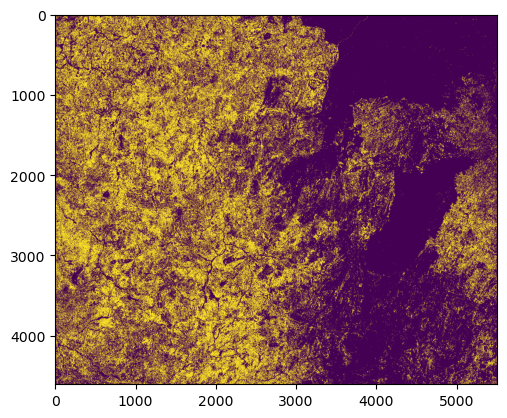

In [ ]:
## Viasualize the masked data

plt.imshow(data_[0,:,:]);

## Exercise

- Search for "Burkina Faso Administrative Boundaries" dataset on DDH and retrieve metadata for all its resources. 
- Use the resource IDs to get the file URL for "District boundary" geojson file. 
- Now search for "Burkina Faso - Electricity Transmission Network" dataset and get the fle link for Geojson file. 
- Use these two layers to visually overlay on top of each other

Hint:
- While plotting first geodataframe, assign it to a variable `ax`
- For second dataframe's plot, assign the parameter `ax=ax`. For instance, plot for gdf2 will look like `gdf2.plot(ax=ax)`
- Double check if the two geodataframes have the same CRS. 
    - check if `print(gdf1.crs == gdf2.crs)`
    - If not, you can set gdf2 crs as `gdf2 = gdf2.set_crs(gdf1.crs, allow_override=True)`